### Creating Data :  Binary Classification

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples = 1000,
                   noise = 0.05, random_state = 2)

In [2]:
import pandas as pd
df = pd.DataFrame({"X1":X[:, 0],
              "X2":X[:, 1], 
             "y": y})

In [3]:
df.head()

,X1,X2,y
0,0.816444,0.542213,0
1,-0.734256,0.239790,1
2,-0.267787,-0.706742,1
3,-0.890532,-0.535452,0
4,0.471370,-0.697129,1


In [4]:
df.y.value_counts(), df.shape

(0    500
 1    500
 Name: y, dtype: int64,
 (1000, 3))

### Visualizing Data 

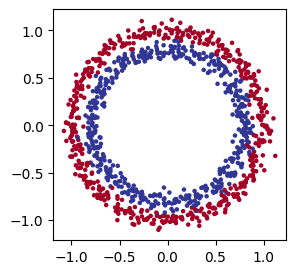

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu, s = 5);

In [6]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [7]:
X[:5], y[:5]

(tensor([[ 0.8164,  0.5422],
         [-0.7343,  0.2398],
         [-0.2678, -0.7067],
         [-0.8905, -0.5355],
         [ 0.4714, -0.6971]]),
 tensor([0., 1., 1., 0., 1.]))

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state  =2)
X_train.shape, y_train.shape

(torch.Size([700, 2]), torch.Size([700]))

### Creating Model

In [9]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Simple 3 sequential model with linear layers

In [10]:
class Modelv1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features = 2, out_features = 5)
        self.l2 = nn.Linear(in_features = 5, out_features = 5)
        self.l3 = nn.Linear(in_features = 5, out_features = 1)
        
    def forward(self, X):
        return self.l3(self.l2(self.l1(X)))
        

In [11]:
model1 = Modelv1().to(device)
model1

Modelv1(
  (l1): Linear(in_features=2, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model1.state_dict()

OrderedDict([('l1.weight',
              tensor([[-0.4157,  0.2155],
                      [ 0.2447,  0.4610],
                      [ 0.4630, -0.1042],
                      [ 0.5026, -0.5171],
                      [-0.0890, -0.5838]], device='cuda:0')),
             ('l1.bias',
              tensor([-0.5815, -0.2017, -0.2327, -0.2811, -0.0940], device='cuda:0')),
             ('l2.weight',
              tensor([[-0.1371,  0.3636, -0.0299,  0.0013, -0.4149],
                      [ 0.0684, -0.0807,  0.4447,  0.3890, -0.4047],
                      [ 0.1148, -0.3572,  0.0165,  0.0018, -0.0804],
                      [-0.1353, -0.3771,  0.2019, -0.3920, -0.2451],
                      [ 0.3176,  0.1992,  0.2542,  0.0570, -0.3989]], device='cuda:0')),
             ('l2.bias',
              tensor([-0.2108,  0.2437, -0.3467,  0.2528,  0.2318], device='cuda:0')),
             ('l3.weight',
              tensor([[-0.3923, -0.0660,  0.2145, -0.3042, -0.2244]], device='cuda:0')),
           

### Defining Loss and optimizer

In [13]:
loss_fn = nn.BCEWithLogitsLoss()

optimzer = torch.optim.SGD(model1.parameters(), lr= 0.1)

In [14]:
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device),  y_test.to(device)

### Accuracy metric

In [15]:
def accuracy_fn(y_pred, y_test):
    acc_count = torch.eq(y_pred ,  y_test).sum().item()
    acc = acc_count/len(y_pred)
    return acc

### Train and Test loop

In [16]:
epochs = 100

for epoch in range(epochs):
    
    model1.train()
    
    logits = model1(X_train).squeeze()
    
    loss = loss_fn(logits, y_train)
    
    acc = accuracy_fn(torch.round(torch.sigmoid(logits)), y_train)
    
    optimzer.zero_grad()
    
    loss.backward()
    
    optimzer.step()
        
    model1.eval()
    
    with torch.inference_mode():

        logits_test = model1(X_test).squeeze()

        loss_test = loss_fn(logits_test, y_test)

        acc_test = accuracy_fn(torch.round(torch.sigmoid(logits_test)), y_test)
    
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss_test:.5f}, Test acc: {acc_test:.2f}%")


Epoch: 0 | Loss: 0.70057, Accuracy: 0.48% | Test loss: 0.70079, Test acc: 0.45%
Epoch: 10 | Loss: 0.69744, Accuracy: 0.48% | Test loss: 0.69931, Test acc: 0.49%
Epoch: 20 | Loss: 0.69616, Accuracy: 0.49% | Test loss: 0.69884, Test acc: 0.49%
Epoch: 30 | Loss: 0.69553, Accuracy: 0.50% | Test loss: 0.69861, Test acc: 0.50%
Epoch: 40 | Loss: 0.69515, Accuracy: 0.50% | Test loss: 0.69840, Test acc: 0.50%
Epoch: 50 | Loss: 0.69489, Accuracy: 0.50% | Test loss: 0.69819, Test acc: 0.49%
Epoch: 60 | Loss: 0.69468, Accuracy: 0.50% | Test loss: 0.69798, Test acc: 0.49%
Epoch: 70 | Loss: 0.69452, Accuracy: 0.51% | Test loss: 0.69776, Test acc: 0.50%
Epoch: 80 | Loss: 0.69437, Accuracy: 0.51% | Test loss: 0.69755, Test acc: 0.50%
Epoch: 90 | Loss: 0.69425, Accuracy: 0.51% | Test loss: 0.69735, Test acc: 0.49%


### Vizualize decision boundaries

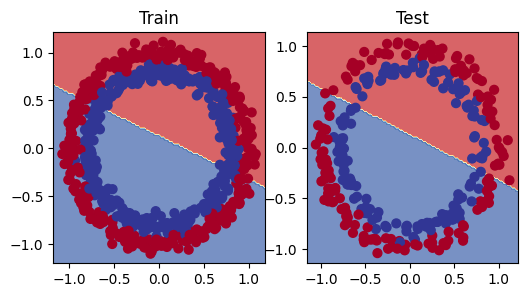

In [17]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

### Model2: Adding non linearity

In [18]:
class Modelv2(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features = 2, out_features = 5)
        self.l2 = nn.Linear(in_features = 5, out_features = 10)
        self.l3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU()
    def forward(self, X):
        return self.l3(self.relu(self.l2(self.relu(self.l1(X)))))
        

In [19]:
model2 = Modelv2().to(device)

In [20]:
model2

Modelv2(
  (l1): Linear(in_features=2, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Optimizer and loss

In [21]:
optimzer = torch.optim.SGD(model2.parameters(), lr = 0.1)

loss_fn = nn.BCEWithLogitsLoss()

### Train and Test loop

In [22]:
epochs = 2000

for epoch in range(epochs):
    
    model2.train()
    
    logits = model2(X_train).squeeze()
    
    loss = loss_fn(logits, y_train)
    
    acc = accuracy_fn(torch.round(torch.sigmoid(logits)), y_train)
    
    optimzer.zero_grad()
    
    loss.backward()
    
    optimzer.step()
    
    model2.eval()
    
    with torch.inference_mode():
        logits_test = model2(X_test).squeeze()
    
        loss_test = loss_fn(logits_test, y_test)

        acc_test = accuracy_fn(torch.round(torch.sigmoid(logits_test)), y_test)

        
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss_test:.5f}, Test acc: {acc_test:.2f}%")

        

Epoch: 0 | Loss: 0.69526, Accuracy: 0.49% | Test loss: 0.69683, Test acc: 0.45%
Epoch: 100 | Loss: 0.69414, Accuracy: 0.51% | Test loss: 0.69550, Test acc: 0.46%
Epoch: 200 | Loss: 0.69340, Accuracy: 0.51% | Test loss: 0.69462, Test acc: 0.49%
Epoch: 300 | Loss: 0.69273, Accuracy: 0.52% | Test loss: 0.69388, Test acc: 0.51%
Epoch: 400 | Loss: 0.69195, Accuracy: 0.57% | Test loss: 0.69308, Test acc: 0.58%
Epoch: 500 | Loss: 0.69098, Accuracy: 0.58% | Test loss: 0.69215, Test acc: 0.56%
Epoch: 600 | Loss: 0.68975, Accuracy: 0.57% | Test loss: 0.69102, Test acc: 0.56%
Epoch: 700 | Loss: 0.68814, Accuracy: 0.57% | Test loss: 0.68953, Test acc: 0.55%
Epoch: 800 | Loss: 0.68584, Accuracy: 0.59% | Test loss: 0.68732, Test acc: 0.56%
Epoch: 900 | Loss: 0.68230, Accuracy: 0.60% | Test loss: 0.68354, Test acc: 0.56%
Epoch: 1000 | Loss: 0.67886, Accuracy: 0.60% | Test loss: 0.67989, Test acc: 0.57%
Epoch: 1100 | Loss: 0.67354, Accuracy: 0.59% | Test loss: 0.67295, Test acc: 0.57%
Epoch: 1200 | Lo

### Visualize decision boundaries

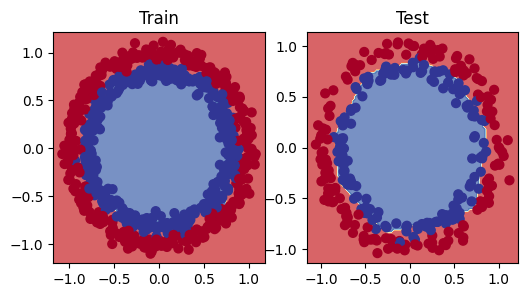

In [23]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)

## Multiclass Classification
### Creating dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


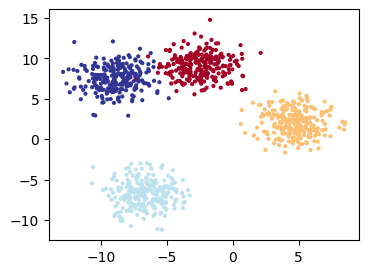

In [24]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(4, 3))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu, s= 4);

### Model3

In [25]:
class BlobModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.linear_seq = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                                        
                                 
                                nn.Linear(in_features = 5, out_features = 5), 
                                nn.Linear(in_features = 5, out_features = 4))
    def forward(self, X):
        return self.linear_seq(X)

In [26]:
model3 = BlobModel().to(device)

In [27]:
model3

BlobModel(
  (linear_seq): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=4, bias=True)
  )
)

### loss and optimzer 

In [28]:
loss_fn =nn.CrossEntropyLoss()

optimzer = torch.optim.SGD(model3.parameters(), lr = 0.1)

In [29]:
X_blob_train, y_blob_train, X_blob_test, y_blob_test =X_blob_train.to(device), y_blob_train.to(device), X_blob_test.to(device), y_blob_test.to(device)

### Train and Test loop

In [30]:
epochs = 100

for epoch in range(epochs):
    
    model3.train()
    
    logits = model3(X_blob_train).squeeze()
    
    loss = loss_fn(logits, y_blob_train)
    
    sigmoid_out = torch.nn.functional.softmax(logits, dim = 1)
    
    acc = accuracy_fn(torch.argmax(sigmoid_out, dim = 1), y_blob_train)
    
    optimzer.zero_grad()
    
    loss.backward()
    
    optimzer.step()
    
    model3.eval()
    
    with torch.inference_mode():
        logits_test = model3(X_blob_test).squeeze()
    
        loss_test = loss_fn(logits_test, y_blob_test)
        
        sigmoid_out = torch.nn.functional.softmax(model3(X_blob_test), dim = 1)
    
        acc_test = accuracy_fn(torch.argmax(sigmoid_out, dim = 1), y_blob_test)

        
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {loss_test:.5f}, Test acc: {acc_test:.2f}%")

        

Epoch: 0 | Loss: 1.50247, Accuracy: 0.24% | Test loss: 1.27372, Test acc: 0.67%
Epoch: 10 | Loss: 0.31126, Accuracy: 0.86% | Test loss: 0.29892, Test acc: 0.91%
Epoch: 20 | Loss: 0.12276, Accuracy: 0.99% | Test loss: 0.11543, Test acc: 0.99%
Epoch: 30 | Loss: 0.07755, Accuracy: 0.99% | Test loss: 0.07074, Test acc: 0.99%
Epoch: 40 | Loss: 0.05902, Accuracy: 0.99% | Test loss: 0.05213, Test acc: 0.99%
Epoch: 50 | Loss: 0.04927, Accuracy: 0.99% | Test loss: 0.04206, Test acc: 0.99%
Epoch: 60 | Loss: 0.04339, Accuracy: 0.99% | Test loss: 0.03586, Test acc: 0.99%
Epoch: 70 | Loss: 0.03951, Accuracy: 0.99% | Test loss: 0.03170, Test acc: 0.99%
Epoch: 80 | Loss: 0.03678, Accuracy: 0.99% | Test loss: 0.02873, Test acc: 0.99%
Epoch: 90 | Loss: 0.03477, Accuracy: 0.99% | Test loss: 0.02651, Test acc: 0.99%


### Plotting decision boundaries

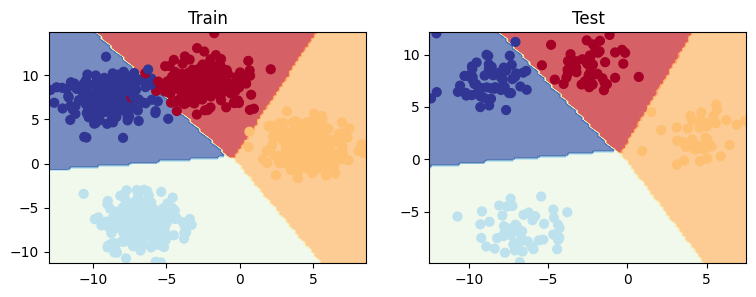

In [31]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_blob_test, y_blob_test)